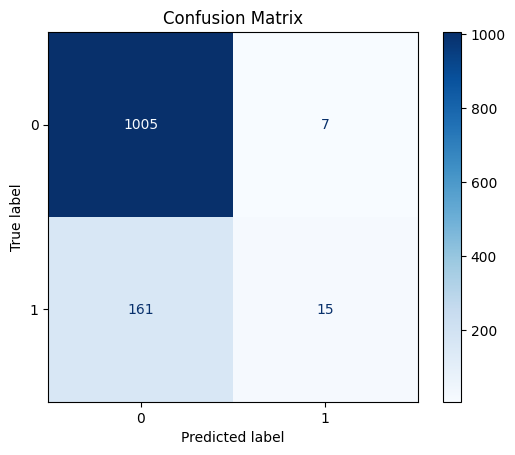

-----------------------------------------------------------------------
Random Forest tree: 0.8585858585858586
-----------------------------------------------------------------------
Random Forest tree:
              precision    recall  f1-score   support

           1       0.86      0.99      0.92      1012
           0       0.68      0.09      0.15       176

    accuracy                           0.86      1188
   macro avg       0.77      0.54      0.54      1188
weighted avg       0.84      0.86      0.81      1188

-----------------------------------------------------------------------


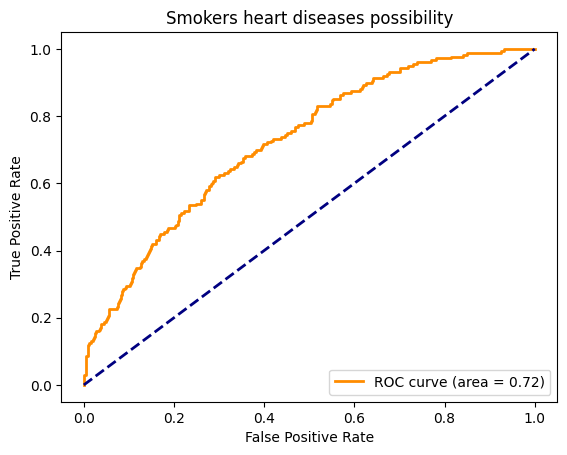

In [9]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

csv_file = pd.read_csv('/content/Heart Disease.csv')

impute = SimpleImputer(missing_values=np.nan, strategy='mean')


null = ["cigsPerDay","BPMeds","BMI","heartRate","glucose","education","totChol",]
for i in null:
    impute.fit(csv_file[[i]])
    csv_file[i] = impute.transform(csv_file[[i]])
csv_file.isnull().sum()

csv_file['gender'] = csv_file['gender'].map({'Female': 0, 'Male': 1})
rest_data = csv_file.drop(["Heart Disease (in next 10 years)"],axis =1)
target = csv_file["Heart Disease (in next 10 years)"]

x_train, x_test, y_train, y_test = train_test_split(rest_data, target, test_size=0.28,random_state=42)

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

lgr = LogisticRegression(max_iter=5000)
lgr.fit(x_train_scaled, y_train)

y_pred = lgr.predict(x_test_scaled)
y_pred_proba = lgr.predict_proba(x_test_scaled)[:, 1]


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
print("-----------------------------------------------------------------------")
print("Random Forest tree:", accuracy_score(y_test, y_pred))
print("-----------------------------------------------------------------------")
print("Random Forest tree:")
print(classification_report(y_test, y_pred, target_names=["1","0"]))
print("-----------------------------------------------------------------------")
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Smokers heart diseases possibility')
plt.legend(loc="lower right")
plt.show()
